In [12]:
# Importation des librairies nécessaires
import pandas as pd               # Pour manipuler les données
import seaborn as sns             # Pour créer des visualisations statistiques
import matplotlib.pyplot as plt   # Pour les graphiques personnalisés

# Chargement du dataset (si df n'est pas encore chargé dans ce notebook)
df = pd.read_csv("creditcard.csv")

# Affichage des premières lignes pour vérifier que les données sont bien chargées
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


boxplot Amount vs Class

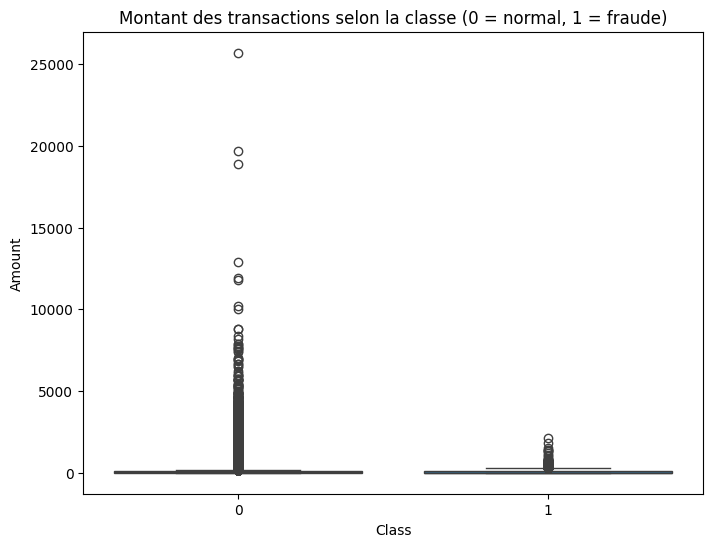

In [13]:
# Création d'une figure avec une taille personnalisée (largeur=8, hauteur=6)
plt.figure(figsize=(8,6))

# Création d'un boxplot pour comparer la distribution du montant (Amount)
# entre les classes 0 (transactions normales) et 1 (transactions frauduleuses)
sns.boxplot(x="Class", y="Amount", data=df)

# Ajout d'un titre explicatif au graphique
plt.title("Montant des transactions selon la classe (0 = normal, 1 = fraude)")

# Affichage du graphique final
plt.show()


Observation 1 — La plupart des transactions frauduleuses ont des montants faibles

On observe que les transactions frauduleuses (classe 1) sont majoritairement associées à des montants relativement faibles.
Le boxplot montre que la quasi-totalité des fraudes se situent sous les 300 € environ.

 Cela signifie que la fraude n’est pas principalement liée à des montants élevés, contrairement à ce que l’on pourrait croire.

Observation 2 — Les transactions normales présentent des montants plus variés

Les transactions normales (classe 0) couvrent une gamme beaucoup plus large de montants, allant de très petites valeurs jusqu'à plus de 25 000 €.

 Les comportements des clients légitimes sont très variés, ce qui se reflète dans :

la grande hauteur du boxplot,

la présence de nombreux outliers,

une forte dispersion.

Observation 3 — Nombreux outliers en classe 0 (normal)

Les points isolés (outliers) sur la classe 0 montrent que les transactions normales incluent des opérations très élevées.
Cela ne signifie pas qu’elles sont suspectes : certaines transactions légitimes peuvent être très importantes (achats en ligne, paiements professionnels, etc.).

Observation 4 — Peu d’outliers en classe 1 (fraude)

Les fraudes semblent se concentrer dans une zone étroite sans grande variation de montant.
Cela suggère que les fraudeurs privilégient des montants faibles pour éviter d’être détectés rapidement.

 Les petits montants sont souvent utilisés dans la fraude pour :

tester une carte volée,

éviter que le propriétaire remarque la transaction,

contourner les règles antifraude basées sur les montants élevés.

**En Resumé**

Le montant des transactions n'est pas un bon prédicteur direct de la fraude.
Les transactions frauduleuses ne sont pas systématiquement élevées ; au contraire, elles se concentrent autour de montants relativement faibles.
Les transactions normales présentent une grande variabilité, avec de nombreux outliers correspondant à des paiements élevés.
Cette observation suggère que les montants seuls ne suffisent pas à détecter la fraude, mais qu’ils doivent être combinés avec d’autres variables plus discriminantes.

Distribution Amount par classe

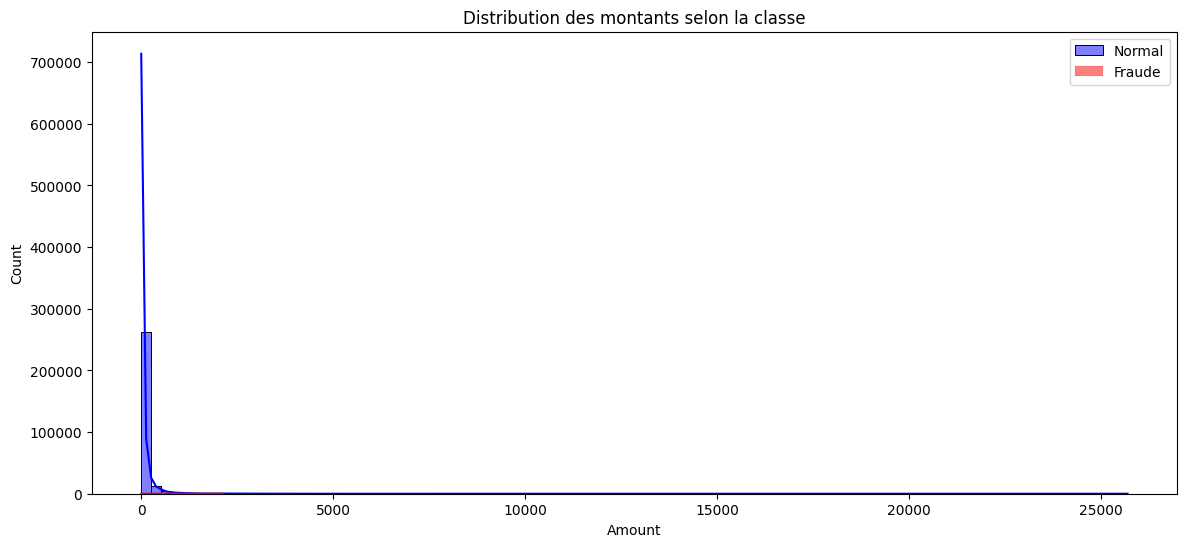

In [14]:
# Création d'une figure grande pour comparer les distributions
plt.figure(figsize=(14,6))

# Histogramme pour les transactions normales (classe 0)
sns.histplot(df[df["Class"] == 0]["Amount"], bins=100, color="blue", label="Normal", kde=True)

# Histogramme pour les transactions frauduleuses (classe 1)
sns.histplot(df[df["Class"] == 1]["Amount"], bins=100, color="red", label="Fraude", kde=True)

# Ajout du titre et de la légende
plt.title("Distribution des montants selon la classe")
plt.legend()

# Affichage final
plt.show()


**Analyse de la distribution des montants selon la classe**

La distribution des montants par classe montre que les transactions frauduleuses ne se distinguent pas clairement des transactions normales.
Les deux distributions sont fortement asymétriques et concentrées près de zéro.
Les fraudes apparaissent principalement dans des montants faibles à moyens, tandis que les transactions élevées sont presque exclusivement légitimes.
Par conséquent, la variable Amount seule n’est pas un critère discriminant pour détecter la fraude. Elle devra être combinée à d’autres variables PCA et temporelles.

**Comparer les distributions V1–V28 selon la classe**

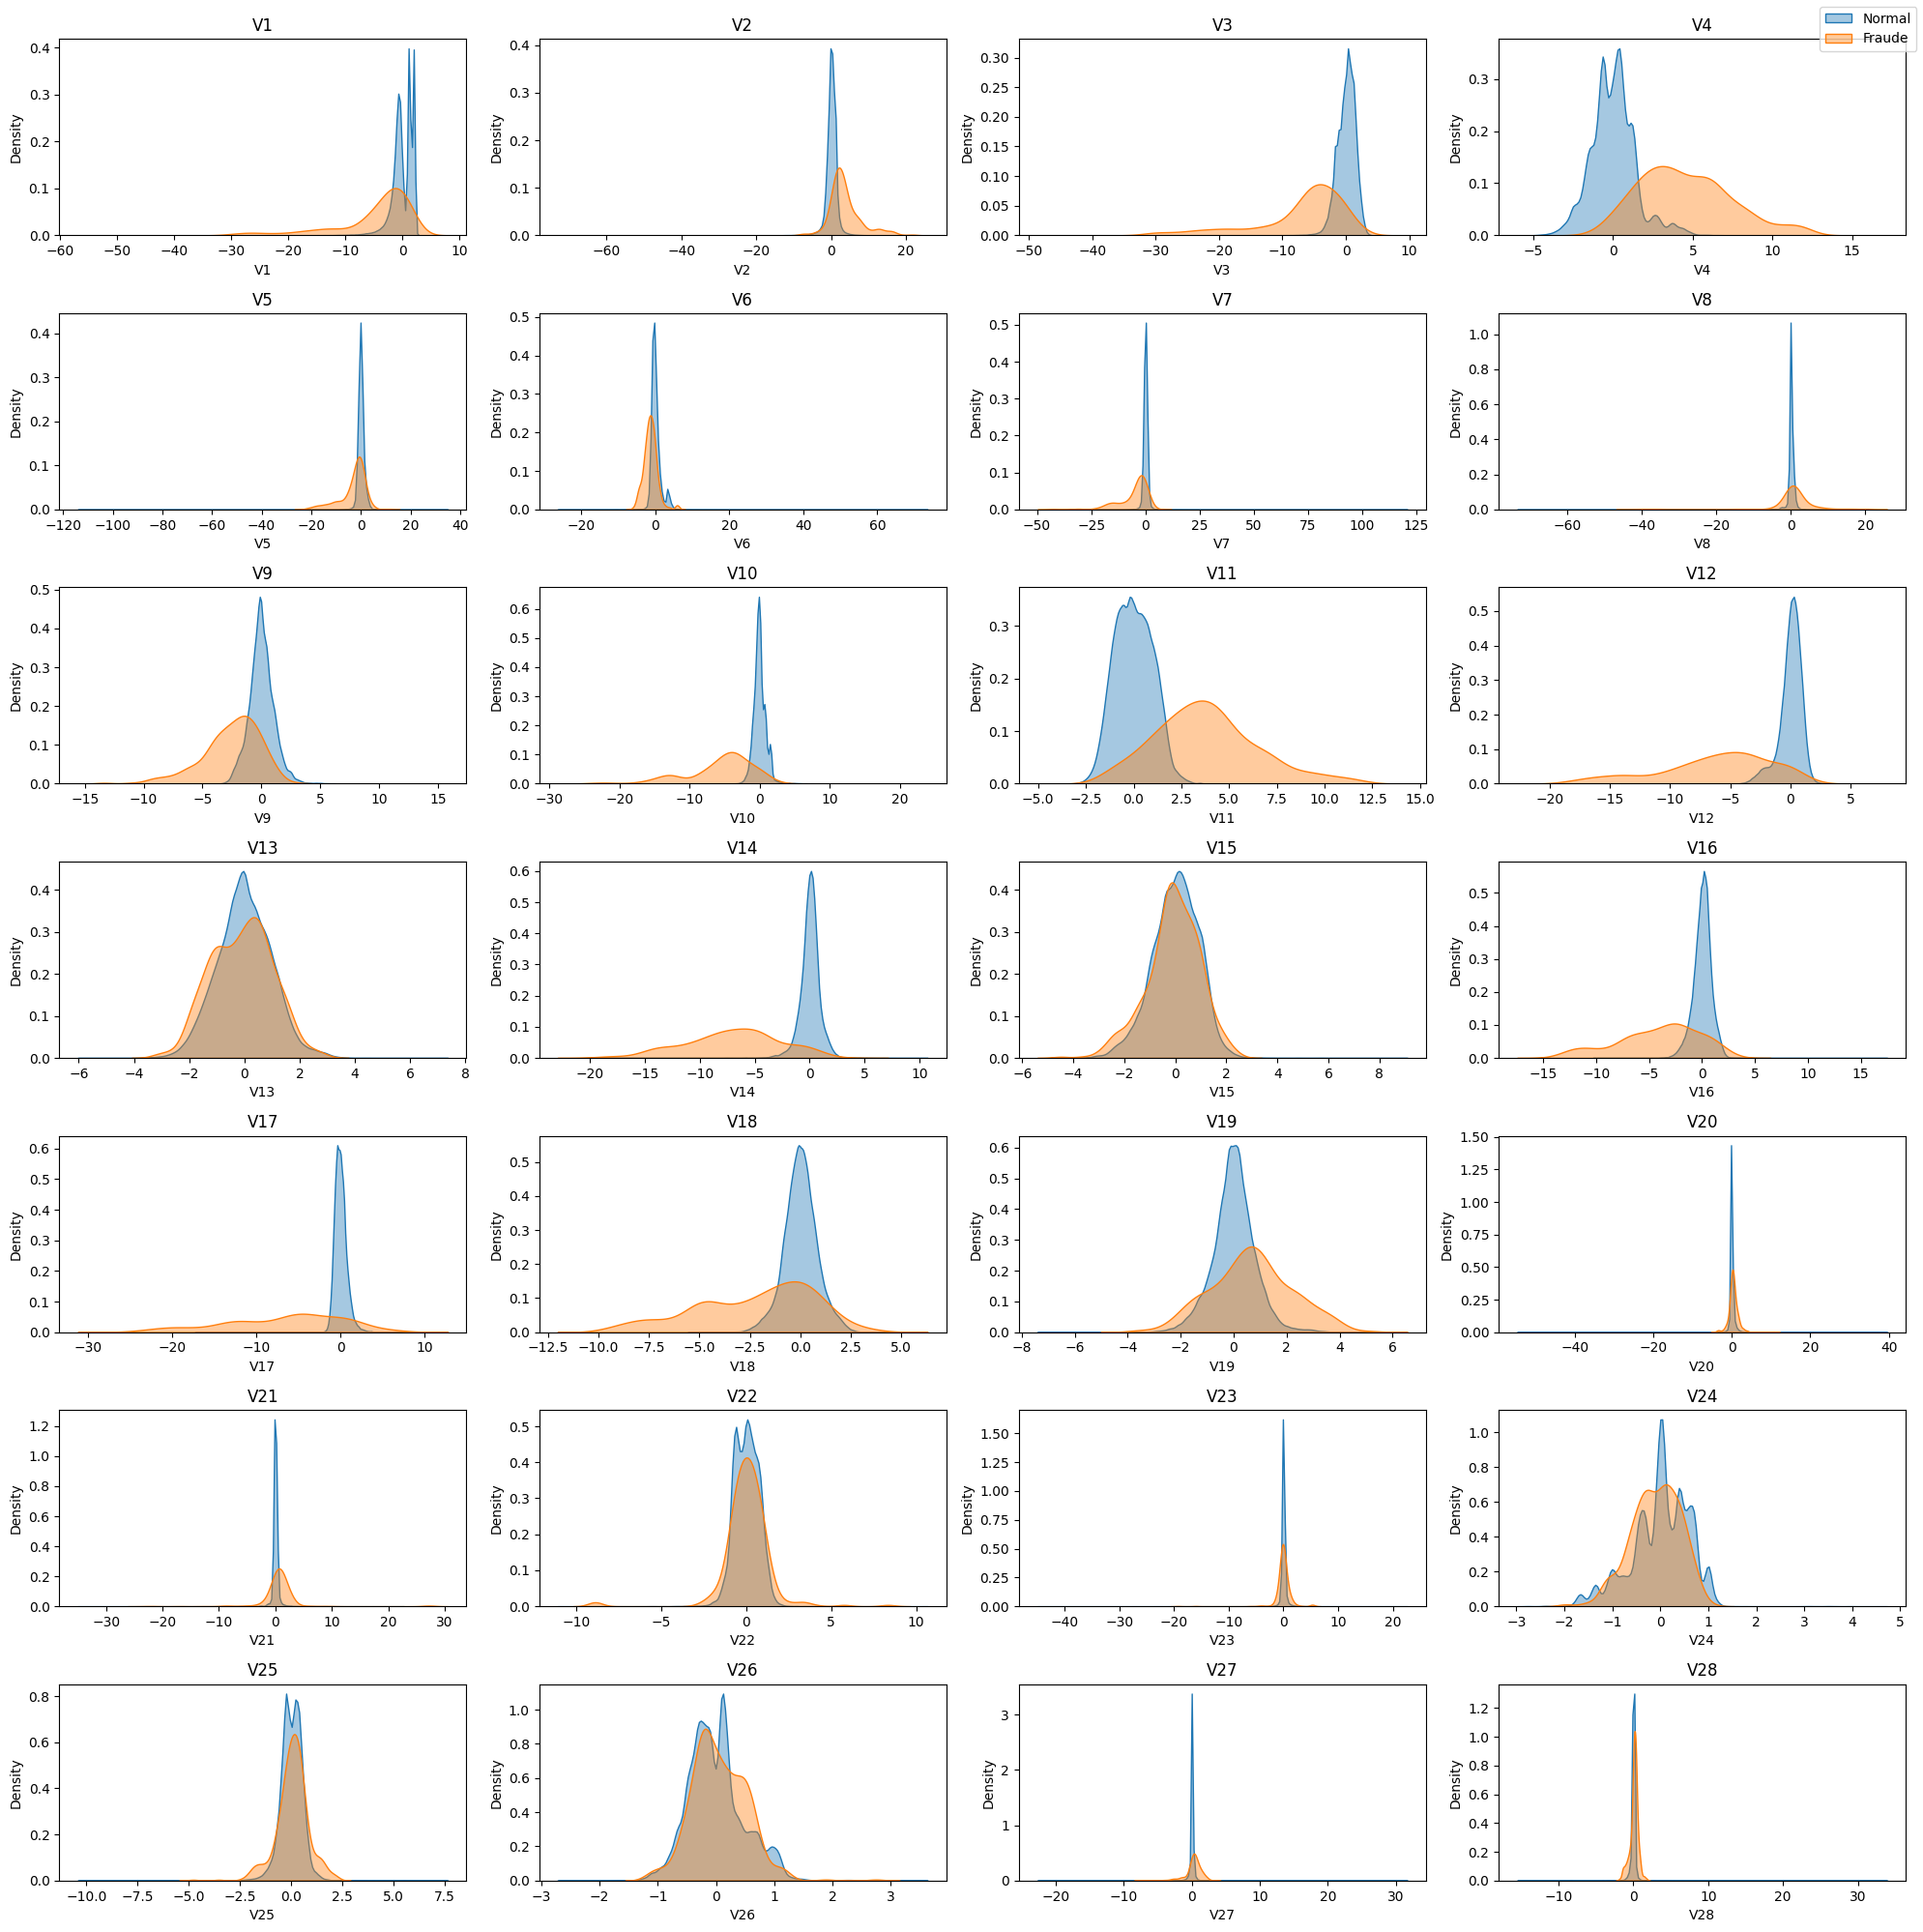

In [16]:
# Liste des variables PCA à analyser
cols = [f"V{i}" for i in range(1, 29)]  # ["V1", "V2", ..., "V28"]

# Définition du nombre de lignes et de colonnes pour la grille de graphiques
n_cols = 4   # 4 graphiques par ligne
n_rows = 7   # 7 lignes (7 x 4 = 28)

# Création de la figure et de la grille d'axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))

# Boucle sur chaque variable PCA
for i, col in enumerate(cols):
    # Calcul de l'indice de ligne et de colonne dans la grille
    row = i // n_cols
    col_idx = i % n_cols
    
    ax = axes[row, col_idx]  # Sélection de l'axe correspondant
    
    # Tracé de la distribution de la variable pour les transactions normales (Class = 0)
    sns.kdeplot(
        df[df["Class"] == 0][col],
        ax=ax,
        label="Normal",
        fill=True,  # zone remplie sous la courbe (optionnel, juste visuel)
        alpha=0.4
    )
    
    # Tracé de la distribution de la variable pour les transactions frauduleuses (Class = 1)
    sns.kdeplot(
        df[df["Class"] == 1][col],
        ax=ax,
        label="Fraude",
        fill=True,
        alpha=0.4
    )
    
    # Titre = nom de la variable (V1, V2, etc.)
    ax.set_title(col)
    
    # On enlève la légende répétée pour chaque subplot (on mettra une légende globale)
    ax.legend().set_visible(False)

# Ajustement de l'espacement entre les sous-graphiques pour éviter les chevauchements
plt.tight_layout()

# Ajout d'une légende globale (en dehors de la grille)
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc="upper right")

# Affichage final
plt.show()


L’analyse bivariée des composantes PCA (V1–V28) met en évidence plusieurs variables fortement discriminantes entre les transactions normales et frauduleuses.

Les variables V10, V12 et V14 présentent une séparation nette entre les deux classes, indiquant qu’elles capturent des comportements anormaux associés à la fraude.
D’autres variables, comme V4, V9, V11 et V17, montrent également une différence de distribution notable, ce qui confirme leur importance potentielle dans un modèle de détection.

À l’inverse, certaines composantes (V6, V13, V15, V21, V22, V23, V27, V28) présentent des distributions quasiment identiques entre les deux classes.
Elles sont donc moins pertinentes pour distinguer les transactions frauduleuses.

Cette analyse conforte l’idée que la détection de fraude repose davantage sur des patterns complexes capturés par les composantes PCA que sur des variables simples comme le montant ou le temps.

**Heatmap des corrélations**

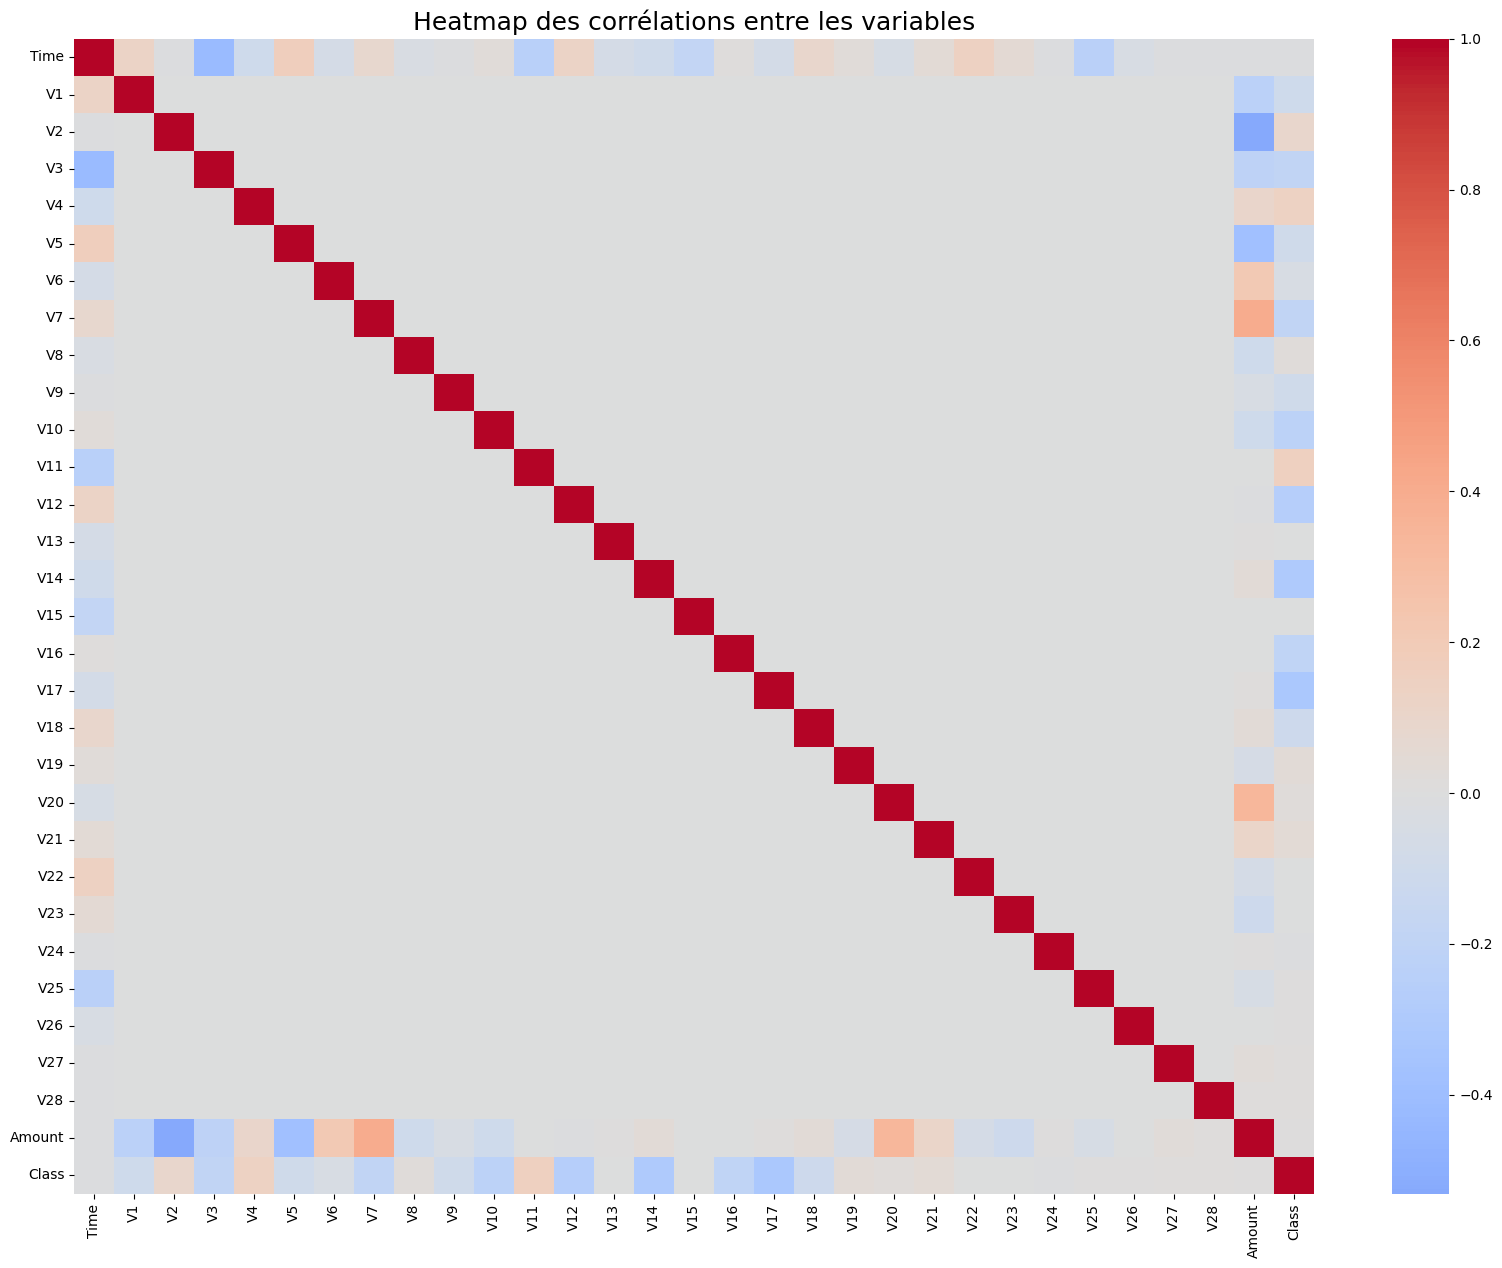

In [17]:
# Importation des librairies nécessaires
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------------
# Calcul de la matrice de corrélation
# -------------------------------
# df.corr() calcule la corrélation entre TOUTES les variables numériques du dataset.
corr_matrix = df.corr()

# -------------------------------
# Création de la figure
# -------------------------------
plt.figure(figsize=(20, 15))  # Taille large pour bien lire la heatmap

# -------------------------------
# Affichage de la heatmap
# -------------------------------
# annot=False : on n'affiche pas les valeurs pour éviter la surcharge visuelle
# cmap='coolwarm' : palette bleu (corrélation négative) → rouge (corrélation positive)
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)

# -------------------------------
# Ajout d'un titre
# -------------------------------
plt.title("Heatmap des corrélations entre les variables", fontsize=18)

# -------------------------------
# Affichage final
# -------------------------------
plt.show()


**corrélation avec la variable Class**

In [18]:
# Sélection de la corrélation entre chaque variable et la variable cible 'Class'
corr_with_class = corr_matrix["Class"].sort_values(ascending=False)

# Affichage pour analyse
print(corr_with_class)


Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64


**Analyse**

L’analyse de la matrice de corrélation montre que les variables originales Amount et Time présentent une corrélation quasi nulle avec la variable cible Class. Cela confirme que la fraude ne dépend pas directement du montant ou du moment de la transaction.

En revanche, plusieurs composantes PCA apparaissent comme particulièrement discriminantes.
Les variables V17, V14, V12, V10 et V11 affichent les corrélations les plus fortes en valeur absolue (entre –0.32 et +0.15), ce qui indique qu’elles capturent des motifs comportementaux liés à la fraude.

Les corrélations restent globalement faibles, ce qui est attendu dans un problème de fraude extrêmement rare et fortement non linéaire.
Cela suggère que des modèles complexes (Random Forest, Gradient Boosting, Réseaux de neurones) seront plus adaptés qu’un modèle linéaire simple.

Cette étape confirme que les composantes PCA contiennent l’essentiel de l’information permettant de distinguer les transactions frauduleuses des transactions normales.
